# Basic Overview 
The primary objective is to visualize and analyze the the nutrition and obesity related data for USA.

Comments/criticisms/appreciations are greatly accepted and appreciated. Do not be shy and send me an email at babinu@gmail.com !

Source of data : https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system-f645f

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [221]:
nutrition_obesity_data = pd.read_csv('project_3_nutrition_obesity_analysis.csv')

In [222]:
nutrition_obesity_data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [223]:
nutrition_obesity_data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

### Too many columns ! Let us go step by step. Are the values in YearStart and YearEnd columns identical ?

In [224]:
# Sum the number of True's here. 
if (nutrition_obesity_data['YearStart'] != nutrition_obesity_data['YearEnd']).sum() == 0:
    print("YearStart and YearEnd columns are identical. Hence, one of these can be safely removed.")
else:
    print("YearStart and YearEnd columns are not identical.")

YearStart and YearEnd columns are identical. Hence, one of these can be safely removed.


In [225]:
nutrition_obesity_data_v1 = nutrition_obesity_data.drop(columns=['YearEnd'])
nutrition_obesity_data_v1.rename(columns={'YearStart' : 'Year'}, inplace=True)

In [226]:
nutrition_obesity_data_v1.head()

,Year,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.8,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


### Are the values in the 'Year' column coming out as expected ?

In [227]:
print('Unique entries in the column \'Year\' are ', nutrition_obesity_data_v1['Year'].unique())

Unique entries in the column 'Year' are  [2011 2012 2014 2013 2015 2016]


### Shouldn't having both 'LocationAbbr' and 'LocationDesc' columns be redundant ? Can't we remove one of them ?

In [228]:
print("Number of unique LocationAbbr entries are ", len(nutrition_obesity_data_v1['LocationAbbr'].unique()))
print("Number of unique LocationDesc entries are ", len(nutrition_obesity_data_v1['LocationDesc'].unique()))
print("Number of unique (LocationAbbr, LocationDesc) tuples are ", 
      len(nutrition_obesity_data_v1[['LocationAbbr','LocationDesc']].drop_duplicates()))
nutrition_obesity_data_v1.drop(columns=['LocationAbbr'], inplace=True)

Number of unique LocationAbbr entries are  55
Number of unique LocationDesc entries are  55
Number of unique (LocationAbbr, LocationDesc) tuples are  55


In [229]:
nutrition_obesity_data_v1.head()

,Year,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.0,32.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,32.3,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.8,31.8,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,33.6,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,32.8,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


### Why do we have 55 states instead of 50?

In [230]:
nutrition_obesity_data_v1['LocationDesc'].unique()

array(['Alabama', 'National', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Connecticut', 'Colorado', 'Delaware', 'Florida',
       'District of Columbia', 'Georgia', 'Guam', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'West Virginia', 'Washington', 'Wisconsin', 'Wyoming',
       'Virgin Islands'], dtype=object)

### We see 5 additional entries for 'District of Columbia', 'National', 'Guam', 'Puerto Rico', 'Virgin Islands'

In [231]:
nutrition_obesity_data_v1.head()

,Year,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.0,32.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,32.3,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.8,31.8,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,33.6,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,32.8,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


### What exactly do the values of datasource column show ? Do we really need it ?


In [232]:
nutrition_obesity_data_v1['Datasource'].unique()

array(['Behavioral Risk Factor Surveillance System'], dtype=object)

In [233]:
nutrition_obesity_data_v1.drop(columns=['Datasource'], inplace=True)

In [234]:
nutrition_obesity_data_v1.head()

,Year,LocationDesc,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.0,32.0,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,32.3,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.8,31.8,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,33.6,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,32.8,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


### Can we check out 'Class/Topic' columns as well here ?

In [235]:
print("Number of unique entries in \'Class\' column is ", len(nutrition_obesity_data_v1['Class'].unique()))
print("Number of unique entries in \'Topic\' column is ", len(nutrition_obesity_data_v1['Topic'].unique()))
print("Number of unique entries in (\'Class', \'Topic\') tuples is ", 
      len(nutrition_obesity_data_v1[['Class','Topic']].drop_duplicates()))

print(nutrition_obesity_data_v1['Class'].unique())
print(nutrition_obesity_data_v1['Topic'].unique())
nutrition_obesity_data_v1.drop(columns=['Topic'], inplace=True)

Number of unique entries in 'Class' column is  3
Number of unique entries in 'Topic' column is  3
Number of unique entries in ('Class', 'Topic') tuples is  3
['Obesity / Weight Status' 'Fruits and Vegetables' 'Physical Activity']
['Obesity / Weight Status' 'Fruits and Vegetables - Behavior'
 'Physical Activity - Behavior']


In [236]:
nutrition_obesity_data_v1.head()

,Year,LocationDesc,Class,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.0,32.0,NaN,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,32.3,NaN,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.8,31.8,NaN,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,33.6,NaN,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,32.8,NaN,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


### What about 'Question' column ?

In [237]:
nutrition_obesity_data_v1['Question'].unique()

# Looks it makes sense to leave it as it is.

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

### Looks like there are lots of Nans in 'Data_Value_Unit' column . Can we remove the column ? 

### The column 'Data_Value_Type' looks to be redundant as well.

In [238]:
nutrition_obesity_data_v1['Data_Value_Unit'].unique()
nutrition_obesity_data_v1.drop(columns=['Data_Value_Unit'], inplace=True)

In [239]:
nutrition_obesity_data_v1['Data_Value_Type'].unique()
nutrition_obesity_data_v1.drop(columns=['Data_Value_Type'], inplace=True)

In [240]:
nutrition_obesity_data_v1.head()

,Year,LocationDesc,Class,Question,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,32.0,NaN,NaN,30.5,33.5,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,32.3,NaN,NaN,29.9,34.7,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,31.8,NaN,NaN,30.0,33.6,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,33.6,NaN,NaN,29.9,37.6,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,32.8,NaN,NaN,30.2,35.6,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


### Are the columns 'Data_Value_Alt' and 'Data_Value' identical ? If they are, can't we remove one of them ?

In [241]:
(nutrition_obesity_data_v1['Data_Value'] != nutrition_obesity_data_v1['Data_Value_Alt']).sum()


5046

In [242]:
# Drilling down more on these entries.
print(nutrition_obesity_data_v1[
    (nutrition_obesity_data_v1['Data_Value'] != nutrition_obesity_data_v1['Data_Value_Alt']) &
    
     ((nutrition_obesity_data_v1['Data_Value']).notnull())])

print(nutrition_obesity_data_v1[
    (nutrition_obesity_data_v1['Data_Value'] != nutrition_obesity_data_v1['Data_Value_Alt']) &
    
     ((nutrition_obesity_data_v1['Data_Value_Alt']).notnull())])

# Removed redundant column.
nutrition_obesity_data_v1.drop(columns=['Data_Value_Alt'], inplace=True)

Empty DataFrame
Columns: [Year, LocationDesc, Class, Question, Data_Value, Data_Value_Alt, Data_Value_Footnote_Symbol, Data_Value_Footnote, Low_Confidence_Limit, High_Confidence_Limit , Sample_Size, Total, Age(years), Education, Gender, Income, Race/Ethnicity, GeoLocation, ClassID, TopicID, QuestionID, DataValueTypeID, LocationID, StratificationCategory1, Stratification1, StratificationCategoryId1, StratificationID1]
Index: []

[0 rows x 27 columns]
Empty DataFrame
Columns: [Year, LocationDesc, Class, Question, Data_Value, Data_Value_Alt, Data_Value_Footnote_Symbol, Data_Value_Footnote, Low_Confidence_Limit, High_Confidence_Limit , Sample_Size, Total, Age(years), Education, Gender, Income, Race/Ethnicity, GeoLocation, ClassID, TopicID, QuestionID, DataValueTypeID, LocationID, StratificationCategory1, Stratification1, StratificationCategoryId1, StratificationID1]
Index: []

[0 rows x 27 columns]


In [243]:
nutrition_obesity_data_v1.head()

,Year,LocationDesc,Class,Question,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,NaN,NaN,30.5,33.5,7304.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,NaN,NaN,29.9,34.7,2581.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,NaN,NaN,30.0,33.6,4723.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,NaN,NaN,29.9,37.6,1153.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,NaN,NaN,30.2,35.6,2402.0,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


### Is the 'Data_Value_Footnote_Symbol' fully nans ? If yes, can't we just remove it ?

In [244]:
nutrition_obesity_data_v1['Data_Value_Footnote_Symbol'].unique()

array([nan, '~'], dtype=object)

In [245]:
nutrition_obesity_data_v1.drop(columns=['Data_Value_Footnote_Symbol'], inplace=True)

In [246]:
nutrition_obesity_data_v1.head()

,Year,LocationDesc,Class,Question,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,NaN,30.5,33.5,7304.0,Total,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,NaN,29.9,34.7,2581.0,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,NaN,30.0,33.6,4723.0,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,NaN,29.9,37.6,1153.0,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,NaN,30.2,35.6,2402.0,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


### Can't we do the same analysis for 'Data_Value_Footnote' column ?

In [247]:
# Yes, and we are on it !
nutrition_obesity_data_v1['Data_Value_Footnote'].unique()

array([nan, 'Data not available because sample size is insufficient.',
       'Data not available because sample size is insufficient.  If data only missing for the confidence interval, the confidence interval was not calculated.'],
      dtype=object)

In [248]:
nutrition_obesity_data_v1['Data_Value_Footnote'].notnull().sum()

# Significant number of non null entries, hence we are keeping this column for now.

5046

### What exactly do these columns 'Low_Confidence_Limit' and 'High_Confidence_Limit' refer to ? What do we do about them

In [249]:
# These appear to show the range of the values predicted by the model. We will validate and keep these for now.
print("Number of NA values of the column \'Low_Confidence_Limit\'\n", 
      nutrition_obesity_data_v1['Low_Confidence_Limit'].isnull().sum())

print("Range of values of the column \'Low_Confidence_Limit\'\n", 
      nutrition_obesity_data_v1['Low_Confidence_Limit'].describe())
print("Number of NA values of the column \'High_Confidence_Limit\'\n", 
      nutrition_obesity_data_v1['High_Confidence_Limit '].isnull().sum())

print("Range of values of the column \'High_Confidence_Limit\'\n", 
      nutrition_obesity_data_v1['High_Confidence_Limit '].describe())


Number of NA values of the column 'Low_Confidence_Limit'
 5046
Range of values of the column 'Low_Confidence_Limit'
 count    48346.000000
mean        26.892227
std         10.038584
min          0.300000
25%         20.000000
50%         26.450000
75%         32.900000
max         69.500000
Name: Low_Confidence_Limit, dtype: float64
Number of NA values of the column 'High_Confidence_Limit'
 5046
Range of values of the column 'High_Confidence_Limit'
 count    48346.000000
mean        35.989997
std         11.205813
min          3.000000
25%         28.200000
50%         35.600000
75%         42.200000
max         87.700000
Name: High_Confidence_Limit , dtype: float64


In [250]:
nutrition_obesity_data_v1.columns

Index(['Year', 'LocationDesc', 'Class', 'Question', 'Data_Value',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

### What about the validation of other columns ?

In [251]:
## On it !!!
print("Number of NA values of the column \'Sample_Size\'\n", 
      nutrition_obesity_data_v1['Sample_Size'].isnull().sum())
print("Range of values of the column \'Sample_Size\'\n", 
      nutrition_obesity_data_v1['Sample_Size'].describe())


Number of NA values of the column 'Sample_Size'
 5046
Range of values of the column 'Sample_Size'
 count     48346.00000
mean       3889.19286
std       19829.42129
min          50.00000
25%         566.00000
50%        1209.00000
75%        2519.00000
max      476876.00000
Name: Sample_Size, dtype: float64


In [252]:
# Further checking on null sample size cases.
nutrition_obesity_data_v1[nutrition_obesity_data_v1['Sample_Size'].isnull()].head()

,Year,LocationDesc,Class,Question,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
23,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Race/Ethnicity,Asian,RACE,RACEASN
24,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
27,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Race/Ethnicity,Other,RACE,RACEOTH
51,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,VALUE,1,Race/Ethnicity,Asian,RACE,RACEASN
52,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,VALUE,1,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI


In [253]:
nutrition_obesity_data_v2 = nutrition_obesity_data_v1[nutrition_obesity_data_v1['Sample_Size'].notnull()].copy()

In [254]:
nutrition_obesity_data_v2.head()

,Year,LocationDesc,Class,Question,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,NaN,30.5,33.5,7304.0,Total,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,NaN,29.9,34.7,2581.0,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,NaN,30.0,33.6,4723.0,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,NaN,29.9,37.6,1153.0,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,NaN,30.2,35.6,2402.0,NaN,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [255]:
# Verifying that High and Low Confidence limits are indeed not null here.
print("Number of NA values of the column \'Low_Confidence_Limit\'\n", 
      nutrition_obesity_data_v2['Low_Confidence_Limit'].isnull().sum()) 
print("Number of NA values of the column \'High_Confidence_Limit\'\n", 
      nutrition_obesity_data_v2['High_Confidence_Limit '].isnull().sum()) 

Number of NA values of the column 'Low_Confidence_Limit'
 0
Number of NA values of the column 'High_Confidence_Limit'
 0


In [256]:
# Validating Total column
print("Number of NA values of the column \'Total\'\n", 
      nutrition_obesity_data_v2['Total'].isnull().sum())
print("Range of values of the column \'Total\'\n", 
      nutrition_obesity_data_v2['Total'].describe())
print("Unique values of the column \'Total\'\n", 
      nutrition_obesity_data_v2['Total'].unique())

# We have 1907 entries where Total column has the value 'Total'.  So let us keep this for now.

Number of NA values of the column 'Total'
 46439
Range of values of the column 'Total'
 count      1907
unique        1
top       Total
freq       1907
Name: Total, dtype: object
Unique values of the column 'Total'
 ['Total' nan]


In [257]:
nutrition_obesity_data_v2[['Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',  
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1']]

,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
5,NaN,NaN,Some college or technical school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Some college or technical school,EDU,EDUCOTEC
6,NaN,NaN,College graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,College graduate,EDU,EDUCOGRAD
7,NaN,18 - 24,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Age (years),18 - 24,AGEYR,AGEYR1824
8,NaN,25 - 34,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
9,NaN,35 - 44,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Age (years),35 - 44,AGEYR,AGEYR3544


In [258]:
# Validating age column.
print("Number of NA values of the column \'Age(years)\'\n", 
      nutrition_obesity_data_v2['Age(years)'].isnull().sum())
print("Range of values of the column \'Age(years)\'\n", 
      nutrition_obesity_data_v2['Age(years)'].describe())
print("Unique values of the column \'Age(years)\'\n", 
      nutrition_obesity_data_v2['Age(years)'].unique())

# Keeping it for now.

Number of NA values of the column 'Age(years)'
 36908
Range of values of the column 'Age(years)'
 count       11438
unique          6
top       45 - 54
freq         1907
Name: Age(years), dtype: object
Unique values of the column 'Age(years)'
 [nan '18 - 24' '25 - 34' '35 - 44' '45 - 54' '55 - 64' '65 or older']


In [259]:
# Validating Education column.
print("Number of NA values of the column \'Education\'\n", 
      nutrition_obesity_data_v2['Education'].isnull().sum())
print("Range of values of the column \'Education\'\n", 
      nutrition_obesity_data_v2['Education'].describe())
print("Unique values of the column \'Education\'\n", 
      nutrition_obesity_data_v2['Education'].unique())

# Similary for Gender
print("Unique values of the column \'Gender\'\n", 
      nutrition_obesity_data_v2['Gender'].unique())


# Similary for Race/Ethnicity	
print("Unique values of the column \'Race/Ethnicity\'\n", 
      nutrition_obesity_data_v2['Race/Ethnicity'].unique())

# Similary for GeoLocation
print("Unique values of the column \'GeoLocation\'\n", 
      nutrition_obesity_data_v2['GeoLocation'].unique())


Number of NA values of the column 'Education'
 40718
Range of values of the column 'Education'
 count                     7628
unique                       4
top       High school graduate
freq                      1907
Name: Education, dtype: object
Unique values of the column 'Education'
 [nan 'Less than high school' 'High school graduate'
 'Some college or technical school' 'College graduate']
Unique values of the column 'Gender'
 [nan 'Male' 'Female']
Unique values of the column 'Race/Ethnicity'
 [nan 'Non-Hispanic White' 'Non-Hispanic Black' 'Hispanic'
 'American Indian/Alaska Native' '2 or more races' 'Asian' 'Other'
 'Hawaiian/Pacific Islander']
Unique values of the column 'GeoLocation'
 ['(32.84057112200048, -86.63186076199969)' nan
 '(64.84507995700051, -147.72205903599973)'
 '(34.865970280000454, -111.76381127699972)'
 '(34.74865012400045, -92.27449074299966)'
 '(37.63864012300047, -120.99999953799971)'
 '(41.56266102000046, -72.64984095199964)'
 '(38.843840757000464, -106.13

 ### We see many Id fields in the end. If they are not necessary, could we just remove them ?

In [260]:
# Exploring ClassId
print("Unique values of the column \'ClassID\'\n", 
      nutrition_obesity_data_v2['ClassID'].unique())
print("Unique values of the column \'Class\'\n", 
      nutrition_obesity_data_v2['Class'].unique())
print("Unique (Class, ClassID) tuples are ", 
      (nutrition_obesity_data_v2[['Class','ClassID']].drop_duplicates()))

# We see that ClassId is just a short hand for Class and there is a one to one mapping. Hence we remove it.
nutrition_obesity_data_v2.drop(columns=['ClassID'], inplace=True)


Unique values of the column 'ClassID'
 ['OWS' 'FV' 'PA']
Unique values of the column 'Class'
 ['Obesity / Weight Status' 'Fruits and Vegetables' 'Physical Activity']
Unique (Class, ClassID) tuples are                         Class ClassID
0    Obesity / Weight Status     OWS
56     Fruits and Vegetables      FV
108        Physical Activity      PA


In [261]:
# Exploring TopicId
print("Unique values of the column \'TopicID\'\n", 
      nutrition_obesity_data_v2['TopicID'].unique())
print("Unique values of the column \'Class\'\n", 
      nutrition_obesity_data_v2['Class'].unique())
print("Unique (Class, TopicID) tuples are ", 
      (nutrition_obesity_data_v2[['Class','TopicID']].drop_duplicates()))

# We see that TopicId is just a short hand for Class and there is a one to one mapping. Hence we remove it.
nutrition_obesity_data_v2.drop(columns=['TopicID'], inplace=True)


Unique values of the column 'TopicID'
 ['OWS1' 'FV1' 'PA1']
Unique values of the column 'Class'
 ['Obesity / Weight Status' 'Fruits and Vegetables' 'Physical Activity']
Unique (Class, TopicID) tuples are                         Class TopicID
0    Obesity / Weight Status    OWS1
56     Fruits and Vegetables     FV1
108        Physical Activity     PA1


In [262]:
#QuestionID
# Exploring QuestionID
print("Unique values of the column \'QuestionID\'\n", 
      nutrition_obesity_data_v2['QuestionID'].unique())
print("Unique values of the column \'Class\'\n", 
      nutrition_obesity_data_v2['Question'].unique())
print("Unique (Question, QuestionID) tuples are ", 
      (nutrition_obesity_data_v2[['Question','QuestionID']].drop_duplicates()))

# We see that TopicId is just a short hand for Class and there is a one to one mapping. Hence we remove it.
nutrition_obesity_data_v2.drop(columns=['QuestionID'], inplace=True)


Unique values of the column 'QuestionID'
 ['Q036' 'Q037' 'Q018' 'Q019' 'Q046' 'Q043' 'Q044' 'Q045' 'Q047']
Unique values of the column 'Class'
 ['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who report consuming fruit less than one time daily'
 'Percent of adults who report consuming vegetables less than one time daily'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults

In [263]:
#QuestionID
# Exploring LocationID
print("Number of Unique values of the column \'LocationID\'\n", 
      len(nutrition_obesity_data_v2['LocationID'].unique()))

print("Unique values of the column \'LocationID\'\n", 
      nutrition_obesity_data_v2['LocationID'].unique())

print("Number of Unique values of the column \'LocationDesc\'\n", 
      len(nutrition_obesity_data_v2['LocationDesc'].unique()))

print("Unique values of the column \'LocationDesc\'\n", 
      nutrition_obesity_data_v2['LocationDesc'].unique())

print("Number of Unique (LocationDesc, LocationID) tuples are ", 
      len(nutrition_obesity_data_v2[['LocationDesc','LocationID']].drop_duplicates()))

print("Unique (LocationDesc, LocationID) tuples are ", 
      (nutrition_obesity_data_v2[['LocationDesc','LocationID']].drop_duplicates()))

# We see that TopicId is just a short hand for Class and there is a one to one mapping. Hence we remove it.
nutrition_obesity_data_v2.drop(columns=['LocationID'], inplace=True)


Number of Unique values of the column 'LocationID'
 55
Unique values of the column 'LocationID'
 [ 1 59  2  4  5  6  9  8 10 12 11 13 66 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 72 44 45 46 47 48 49
 50 51 54 53 55 56 78]
Number of Unique values of the column 'LocationDesc'
 55
Unique values of the column 'LocationDesc'
 ['Alabama' 'National' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Connecticut' 'Colorado' 'Delaware' 'Florida' 'District of Columbia'
 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'West Virginia' 'Washington' 'Wisconsin' 'Wyomin

In [264]:
# Exploring DataValueTypeID
print("Number of Unique values of the column \'DataValueTypeID\'\n", 
      len(nutrition_obesity_data_v2['DataValueTypeID'].unique()))

print("Unique values of the column \'DataValueTypeID\'\n", 
      nutrition_obesity_data_v2['DataValueTypeID'].unique())

# We see that this is redundant. Hence we remove it.
nutrition_obesity_data_v2.drop(columns=['DataValueTypeID'], inplace=True)


Number of Unique values of the column 'DataValueTypeID'
 1
Unique values of the column 'DataValueTypeID'
 ['VALUE']


In [265]:
nutrition_obesity_data_v2.columns

Index(['Year', 'LocationDesc', 'Class', 'Question', 'Data_Value',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [266]:

# Exploring StratificationCategoryId1
print("Number of Unique values of the column \'StratificationCategoryId1\'\n", 
      len(nutrition_obesity_data_v2['StratificationCategoryId1'].unique()))

print("Unique values of the column \'StratificationCategoryId1\'\n", 
      nutrition_obesity_data_v2['StratificationCategoryId1'].unique())

print("Number of Unique values of the column \'StratificationCategory1\'\n", 
      len(nutrition_obesity_data_v2['StratificationCategory1'].unique()))

print("Unique values of the column \'StratificationCategory1\'\n", 
      nutrition_obesity_data_v2['StratificationCategory1'].unique())

print("Number of Unique (StratificationCategory1, StratificationCategoryId1) tuples are ", 
      len(nutrition_obesity_data_v2[['StratificationCategory1','StratificationCategoryId1']].drop_duplicates()))

print("Unique (StratificationCategory1, StratificationCategoryId1) tuples are ", 
      (nutrition_obesity_data_v2[['StratificationCategory1','StratificationCategoryId1']].drop_duplicates()))

# We see that TopicId is just a short hand for Class and there is a one to one mapping. Hence we remove it.
nutrition_obesity_data_v2.drop(columns=['StratificationCategoryId1'], inplace=True)


Number of Unique values of the column 'StratificationCategoryId1'
 6
Unique values of the column 'StratificationCategoryId1'
 ['OVR' 'GEN' 'EDU' 'AGEYR' 'INC' 'RACE']
Number of Unique values of the column 'StratificationCategory1'
 6
Unique values of the column 'StratificationCategory1'
 ['Total' 'Gender' 'Education' 'Age (years)' 'Income' 'Race/Ethnicity']
Number of Unique (StratificationCategory1, StratificationCategoryId1) tuples are  6
Unique (StratificationCategory1, StratificationCategoryId1) tuples are     StratificationCategory1 StratificationCategoryId1
0                    Total                       OVR
1                   Gender                       GEN
3                Education                       EDU
7              Age (years)                     AGEYR
13                  Income                       INC
20          Race/Ethnicity                      RACE


In [267]:

# Exploring StratificationCategoryId1
print("Number of Unique values of the column \'StratificationID1\'\n", 
      len(nutrition_obesity_data_v2['StratificationID1'].unique()))

print("Unique values of the column \'StratificationID1\'\n", 
      nutrition_obesity_data_v2['StratificationID1'].unique())

print("Number of Unique values of the column \'Stratification1\'\n", 
      len(nutrition_obesity_data_v2['Stratification1'].unique()))

print("Unique values of the column \'Stratification1\'\n", 
      nutrition_obesity_data_v2['Stratification1'].unique())

print("Number of Unique (Stratification1, StratificationID1) tuples are ", 
      len(nutrition_obesity_data_v2[['Stratification1','StratificationID1']].drop_duplicates()))

print("Unique (Stratification1, StratificationID1) tuples are ", 
      (nutrition_obesity_data_v2[['Stratification1','StratificationID1']].drop_duplicates()))

# We see that TopicId is just a short hand for Class and there is a one to one mapping. Hence we remove it.
nutrition_obesity_data_v2.drop(columns=['StratificationID1'], inplace=True)


Number of Unique values of the column 'StratificationID1'
 28
Unique values of the column 'StratificationID1'
 ['OVERALL' 'MALE' 'FEMALE' 'EDUHS' 'EDUHSGRAD' 'EDUCOTEC' 'EDUCOGRAD'
 'AGEYR1824' 'AGEYR2534' 'AGEYR3544' 'AGEYR4554' 'AGEYR5564' 'AGEYR65PLUS'
 'INCLESS15' 'INC1525' 'INC2535' 'INC3550' 'INC5075' 'INC75PLUS' 'INCNR'
 'RACEWHT' 'RACEBLK' 'RACEHIS' 'RACENAA' 'RACE2PLUS' 'RACEASN' 'RACEOTH'
 'RACEHPI']
Number of Unique values of the column 'Stratification1'
 28
Unique values of the column 'Stratification1'
 ['Total' 'Male' 'Female' 'Less than high school' 'High school graduate'
 'Some college or technical school' 'College graduate' '18 - 24' '25 - 34'
 '35 - 44' '45 - 54' '55 - 64' '65 or older' 'Less than $15,000'
 '$15,000 - $24,999' '$25,000 - $34,999' '$35,000 - $49,999'
 '$50,000 - $74,999' '$75,000 or greater' 'Data not reported'
 'Non-Hispanic White' 'Non-Hispanic Black' 'Hispanic'
 'American Indian/Alaska Native' '2 or more races' 'Asian' 'Other'
 'Hawaiian/Pacific Isla

In [268]:
nutrition_obesity_data_v2['Data_Value_Footnote'].unique()

# See that column 'Data_Value_Footnote' is fully nans, hence we remove it.
nutrition_obesity_data_v2.drop(columns=['Data_Value_Footnote'], inplace=True)

In [269]:
nutrition_obesity_data_v2.columns

Index(['Year', 'LocationDesc', 'Class', 'Question', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'StratificationCategory1',
       'Stratification1'],
      dtype='object')

### Do the columns 'StratificationCategory1' and 'Stratification1' add any new info/value ? If not, can't we just delete them ?

In [270]:
print(nutrition_obesity_data_v2['StratificationCategory1'].isnull().sum())
print(nutrition_obesity_data_v2['Stratification1'].isnull().sum())

0
0


In [271]:
# Get unique values ,so as to check each one of them.
print(nutrition_obesity_data_v2['StratificationCategory1'].unique())
print(nutrition_obesity_data_v2['Stratification1'].unique())
print(nutrition_obesity_data_v2.columns)

['Total' 'Gender' 'Education' 'Age (years)' 'Income' 'Race/Ethnicity']
['Total' 'Male' 'Female' 'Less than high school' 'High school graduate'
 'Some college or technical school' 'College graduate' '18 - 24' '25 - 34'
 '35 - 44' '45 - 54' '55 - 64' '65 or older' 'Less than $15,000'
 '$15,000 - $24,999' '$25,000 - $34,999' '$35,000 - $49,999'
 '$50,000 - $74,999' '$75,000 or greater' 'Data not reported'
 'Non-Hispanic White' 'Non-Hispanic Black' 'Hispanic'
 'American Indian/Alaska Native' '2 or more races' 'Asian' 'Other'
 'Hawaiian/Pacific Islander']
Index(['Year', 'LocationDesc', 'Class', 'Question', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'StratificationCategory1',
       'Stratification1'],
      dtype='object')


In [272]:
# Prove that when StratificationCategory1 == 'Age (years)', these correspond to the cases where 'Age (years)'
# column is not null and the values match that of 'Stratification1' column.

print("Number of entries where StratificationCategory = \'Age (years\'), but column \'Age (years)\' is null is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Age (years)') &
                         (nutrition_obesity_data_v2['Age(years)'].isnull())]))
print("Number of entries where StratificationCategory = \'Age (years\'), but column \'Age (years)\' is mismatching " + 
      "with Stratification1 is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Age (years)') &
                         (nutrition_obesity_data_v2['Age(years)'] != nutrition_obesity_data_v2['Stratification1'])]))

Number of entries where StratificationCategory = 'Age (years'), but column 'Age (years)' is null is  0
Number of entries where StratificationCategory = 'Age (years'), but column 'Age (years)' is mismatching with Stratification1 is  0


In [273]:
# Doing the exact same analysis for column 'Total'
print("Number of entries where StratificationCategory = \'Total\', but column \'Total\' is null is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Total') &
                         (nutrition_obesity_data_v2['Total'].isnull())]))
print("Number of entries where StratificationCategory = \'Total\', but column \'Total\' is mismatching " + 
      "with Stratification1 is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Total') &
                         (nutrition_obesity_data_v2['Total'] != nutrition_obesity_data_v2['Stratification1'])]))

Number of entries where StratificationCategory = 'Total', but column 'Total' is null is  0
Number of entries where StratificationCategory = 'Total', but column 'Total' is mismatching with Stratification1 is  0


In [274]:
# Doing the exact same analysis for column 'Gender'
print("Number of entries where StratificationCategory = \'Gender\', but column \'Gender\' is null is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Gender') &
                         (nutrition_obesity_data_v2['Gender'].isnull())]))
print("Number of entries where StratificationCategory = \'Gender\', but column \'Gender\' is mismatching " + 
      "with Stratification1 is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Gender') &
                         (nutrition_obesity_data_v2['Gender'] != nutrition_obesity_data_v2['Stratification1'])]))

Number of entries where StratificationCategory = 'Gender', but column 'Gender' is null is  0
Number of entries where StratificationCategory = 'Gender', but column 'Gender' is mismatching with Stratification1 is  0


In [275]:
# Doing the exact same analysis for column 'Education'
print("Number of entries where StratificationCategory = \'Education\', but column \'Education\' is null is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Education') &
                         (nutrition_obesity_data_v2['Education'].isnull())]))
print("Number of entries where StratificationCategory = \'Education\', but column \'Education\' is mismatching " + 
      "with Stratification1 is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Education') &
                         (nutrition_obesity_data_v2['Education'] != nutrition_obesity_data_v2['Stratification1'])]))

Number of entries where StratificationCategory = 'Education', but column 'Education' is null is  0
Number of entries where StratificationCategory = 'Education', but column 'Education' is mismatching with Stratification1 is  0


In [276]:
# Doing the exact same analysis for column 'Income'
print("Number of entries where StratificationCategory = \'Income\', but column \'Income\' is null is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Income') &
                         (nutrition_obesity_data_v2['Income'].isnull())]))
print("Number of entries where StratificationCategory = \'Income\', but column \'Income\' is mismatching " + 
      "with Stratification1 is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Income') &
                         (nutrition_obesity_data_v2['Income'] != nutrition_obesity_data_v2['Stratification1'])]))

Number of entries where StratificationCategory = 'Income', but column 'Income' is null is  0
Number of entries where StratificationCategory = 'Income', but column 'Income' is mismatching with Stratification1 is  0


In [277]:
# Doing the exact same analysis for column 'Race/Ethnicity'
print("Number of entries where StratificationCategory = \'Race/Ethnicity\', but column \'Race/Ethnicity\' is null is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Race/Ethnicity') &
                         (nutrition_obesity_data_v2['Race/Ethnicity'].isnull())]))
print("Number of entries where StratificationCategory = \'Race/Ethnicity\', but column \'Race/Ethnicity\' is mismatching " + 
      "with Stratification1 is ",
      len(nutrition_obesity_data_v2[(nutrition_obesity_data_v2['StratificationCategory1'] == 'Race/Ethnicity') &
                         (nutrition_obesity_data_v2['Race/Ethnicity'] != nutrition_obesity_data_v2['Stratification1'])]))

Number of entries where StratificationCategory = 'Race/Ethnicity', but column 'Race/Ethnicity' is null is  0
Number of entries where StratificationCategory = 'Race/Ethnicity', but column 'Race/Ethnicity' is mismatching with Stratification1 is  0


In [278]:
nutrition_obesity_data_v2.drop(columns=['StratificationCategory1', 'Stratification1'], inplace=True)

In [279]:
nutrition_obesity_data_v2.columns

Index(['Year', 'LocationDesc', 'Class', 'Question', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation'],
      dtype='object')

### Do we need the 'GeoLocation' field ?

In [280]:
# The field might be useful, but for our analysis, we will stopping at state, when it comes to analyzing
# locations. Hence, we are removing this field.
nutrition_obesity_data_v3 = nutrition_obesity_data_v2.drop(columns=['GeoLocation'])

In [281]:
nutrition_obesity_data_v3.head()

,Year,LocationDesc,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN


### Let us start analyzing obesity !!!

In [282]:
nutrition_obesity_data_v3[nutrition_obesity_data_v3['Class'] == 'Obesity / Weight Status']

,Year,LocationDesc,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN
5,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,31.0,36.8,1925.0,NaN,NaN,Some college or technical school,NaN,NaN,NaN
6,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,26.4,23.7,29.3,1812.0,NaN,NaN,College graduate,NaN,NaN,NaN
7,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,16.3,12.6,20.9,356.0,NaN,18 - 24,NaN,NaN,NaN,NaN
8,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.2,30.7,40.0,598.0,NaN,25 - 34,NaN,NaN,NaN,NaN
9,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.5,31.6,39.6,865.0,NaN,35 - 44,NaN,NaN,NaN,NaN


In [283]:
nutrition_obesity_data_v3[
    (nutrition_obesity_data_v3['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
    (nutrition_obesity_data_v3['LocationDesc'] == 'Alabama') &
    (nutrition_obesity_data_v3['Year'] == 2011)][['Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity']].head()

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity
0,32.0,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN
1,32.3,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN
2,31.8,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN
3,33.6,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN
4,32.8,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN


In [284]:
alabama_2011_obesity_data = nutrition_obesity_data_v3[(nutrition_obesity_data_v3['LocationDesc'] == 'Alabama') &
                                                      (nutrition_obesity_data_v3['Class'] == 'Obesity / Weight Status') &
                                                      (nutrition_obesity_data_v3['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
                                                      (nutrition_obesity_data_v3['Year'] == 2011)].copy()

In [285]:
alabama_2011_obesity_data[['Data_Value',
        'Class', 'Year', 'LocationDesc',
       'Sample_Size',
       'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity']].head()

,Data_Value,Class,Year,LocationDesc,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity
0,32.0,Obesity / Weight Status,2011,Alabama,7304.0,Total,NaN,NaN,NaN,NaN,NaN
1,32.3,Obesity / Weight Status,2011,Alabama,2581.0,NaN,NaN,NaN,Male,NaN,NaN
2,31.8,Obesity / Weight Status,2011,Alabama,4723.0,NaN,NaN,NaN,Female,NaN,NaN
3,33.6,Obesity / Weight Status,2011,Alabama,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN
4,32.8,Obesity / Weight Status,2011,Alabama,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN


### Ideally shouldn't the sample sizes add up for each classification ? Does that happen ?

In [286]:
alabama_2011_obesity_data[
    alabama_2011_obesity_data['Age(years)'].notnull()]['Sample_Size'].groupby(
    alabama_2011_obesity_data['Age(years)']).sum()

Age(years)
18 - 24         356.0
25 - 34         598.0
35 - 44         865.0
45 - 54        1288.0
55 - 64        1676.0
65 or older    2521.0
Name: Sample_Size, dtype: float64

In [287]:
alabama_2011_obesity_data[
    alabama_2011_obesity_data['Age(years)'].notnull()]['Sample_Size'].groupby(
    alabama_2011_obesity_data['Age(years)']).sum().sum()

7304.0

In [288]:
alabama_2011_obesity_data[alabama_2011_obesity_data['Total'].notnull()]['Sample_Size']

0    7304.0
Name: Sample_Size, dtype: float64

### Do we see the same , when we do aggregation by gender ?

In [289]:
alabama_2011_obesity_data[
    alabama_2011_obesity_data['Gender'].notnull()]['Sample_Size'].groupby(
    alabama_2011_obesity_data['Gender']).sum().sum()

7304.0

### Can we see the trends in the obesity percentage by Gender in Alabama across years ?

In [290]:
# Set year as index for easy plotting later on.
nutrition_obesity_data_v3.set_index('Year', inplace=True)

In [291]:
from plotting_functions import plot_rel_data_v2
def manipulate_and_plot_nutrition_data(attribute_analyzed, 
                                       classification_question, 
                                       state_to_be_analyzed, 
                                       y_axis_label,
                                       x_tick=1, 
                                       y_tick=0.2, 
                                       fig_length=16,
                                       fig_breadth=9,
                                       x_label_font_size=18,
                                       y_label_font_size=16):

    # Gets gender related data for easy plotting later on.
    all_states_obesity_gender_data = \
        nutrition_obesity_data_v3[
            (nutrition_obesity_data_v3[attribute_analyzed].notnull()) &
            (nutrition_obesity_data_v3['Question'] == classification_question)][
            ['LocationDesc','Data_Value', attribute_analyzed]]
    attributes_list = \
        all_states_obesity_gender_data[
            all_states_obesity_gender_data[attribute_analyzed].notnull()][
            attribute_analyzed].unique()

    gender_new_transformed_data = \
        all_states_obesity_gender_data[
            (all_states_obesity_gender_data['LocationDesc'] == state_to_be_analyzed) & 
            (all_states_obesity_gender_data[attribute_analyzed] == attributes_list[0])
        ][['Data_Value']]
    for i in range(1, len(attributes_list)):
        current_attrib_data = \
            all_states_obesity_gender_data[
                (all_states_obesity_gender_data['LocationDesc'] == state_to_be_analyzed) &
                (all_states_obesity_gender_data[attribute_analyzed] == attributes_list[i])
            ][['Data_Value']]
        gender_new_transformed_data = pd.merge(
            gender_new_transformed_data, 
            current_attrib_data, 
            how='inner', 
            left_index=True, 
            right_index=True, 
            suffixes=('_' + attributes_list[i-1], '_' + attributes_list[i]))

    plot_rel_data_v2(gender_new_transformed_data,
                     'Year',
                     y_axis_label,
                     y_axis_label + 
                     ' in ' +  
                     state_to_be_analyzed + 
                     ' (segregated by ' + 
                     attribute_analyzed.lower() + ') across the years',
                     x_tick, y_tick, 
                     fig_length, fig_breadth, 
                     x_label_font_size, y_label_font_size)


       Data_Value_Male  Data_Value_Female
count         6.000000           6.000000
mean         33.366667          34.066667
std           2.029450           1.626858
min          30.900000          31.800000
25%          31.925000          33.175000
50%          33.200000          34.050000
75%          34.700000          34.925000
max          36.200000          36.400000


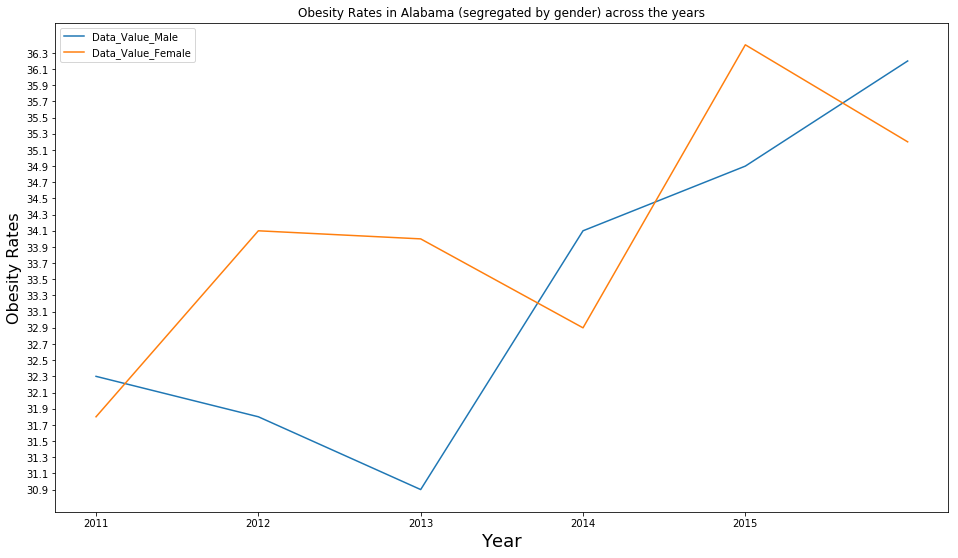

In [292]:
attribute_analyzed = 'Gender'
classification_question = 'Percent of adults aged 18 years and older who have obesity'
state_to_be_analyzed = 'Alabama'
y_axis_label = 'Obesity Rates'
manipulate_and_plot_nutrition_data(attribute_analyzed, 
                                   classification_question, 
                                   state_to_be_analyzed, 
                                   y_axis_label)

       Data_Value_18 - 24  Data_Value_25 - 34  Data_Value_35 - 44  \
count            6.000000            6.000000            6.000000   
mean            21.216667           32.883333           38.550000   
std              3.284763            2.058559            3.587618   
min             16.300000           30.400000           34.100000   
25%             19.350000           31.400000           35.800000   
50%             21.500000           32.600000           38.800000   
75%             23.575000           34.775000           41.050000   
max             25.100000           35.200000           43.000000   

       Data_Value_45 - 54  Data_Value_55 - 64  Data_Value_65 or older  
count            6.000000            6.000000                6.000000  
mean            40.283333           38.700000               28.516667  
std              1.801573            1.931839                1.325770  
min             38.000000           36.400000               26.900000  
25%             39

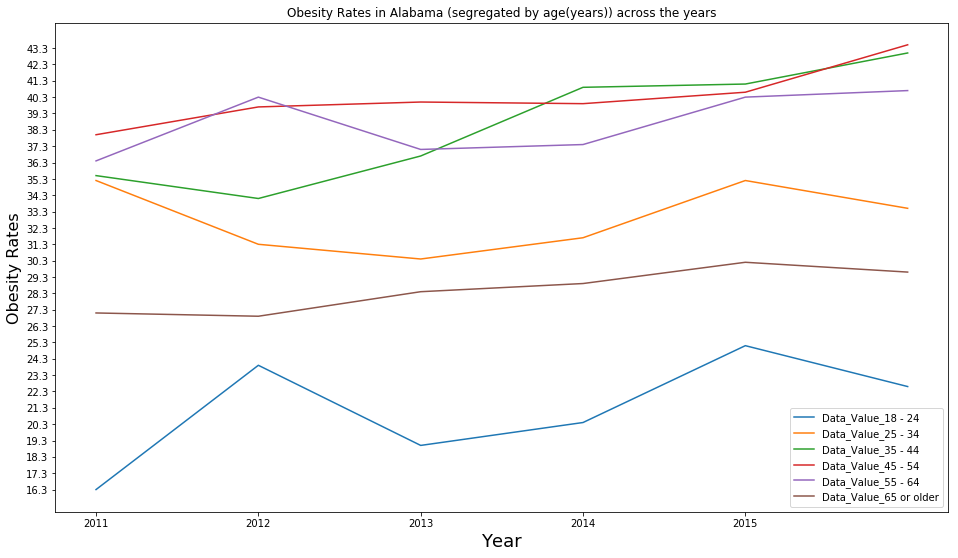

In [293]:
# Segration by Age in Alabama

manipulate_and_plot_nutrition_data('Age(years)', 
                                   'Percent of adults aged 18 years and older who have obesity', 
                                   'Alabama', 
                                   'Obesity Rates',
                                    1,
                                    1)

       Data_Value_18 - 24  Data_Value_25 - 34  Data_Value_35 - 44  \
count            6.000000            6.000000            6.000000   
mean            15.916667           26.466667           31.700000   
std              0.910860            0.625033            1.065833   
min             15.000000           25.600000           29.900000   
25%             15.250000           26.025000           31.400000   
50%             15.650000           26.550000           31.900000   
75%             16.500000           26.925000           32.100000   
max             17.300000           27.200000           33.100000   

       Data_Value_45 - 54  Data_Value_55 - 64  Data_Value_65 or older  
count            6.000000            6.000000                6.000000  
mean            33.516667           33.533333               26.783333  
std              0.990791            0.605530                1.087045  
min             32.400000           32.600000               25.300000  
25%             32

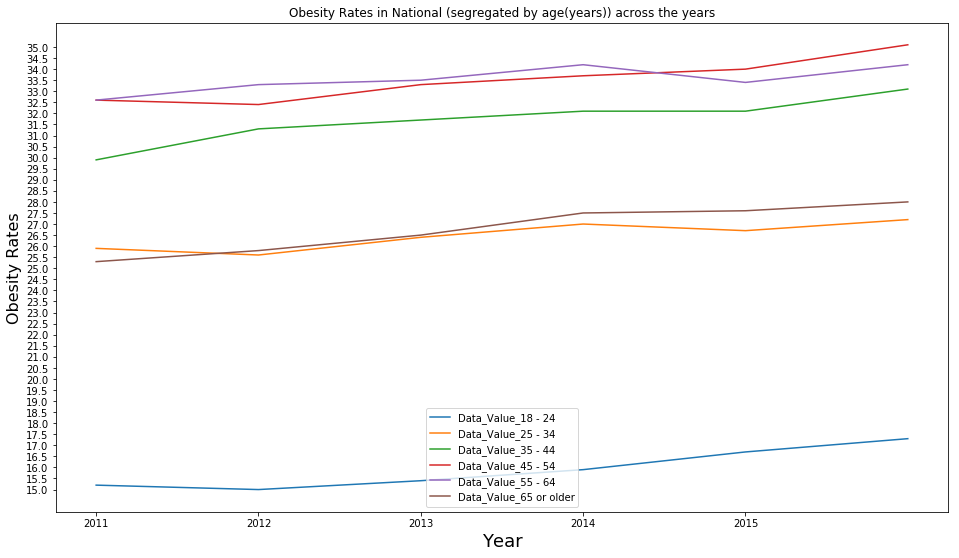

In [294]:
# Same thing for the entire nation.
manipulate_and_plot_nutrition_data('Age(years)', 
                                   'Percent of adults aged 18 years and older who have obesity', 
                                   'National', 
                                   'Obesity Rates',
                                    1,
                                    0.5)

       Data_Value_18 - 24  Data_Value_25 - 34  Data_Value_35 - 44  \
count            6.000000            6.000000            6.000000   
mean            25.483333           33.783333           36.383333   
std              0.495648            0.541910            0.462241   
min             25.000000           32.900000           35.700000   
25%             25.125000           33.550000           36.225000   
50%             25.350000           33.850000           36.300000   
75%             25.725000           34.150000           36.675000   
max             26.300000           34.400000           37.000000   

       Data_Value_45 - 54  Data_Value_55 - 64  Data_Value_65 or older  
count            6.000000            6.000000                6.000000  
mean            37.250000           38.066667               39.266667  
std              0.258844            0.471876                0.258199  
min             37.000000           37.500000               39.000000  
25%             37

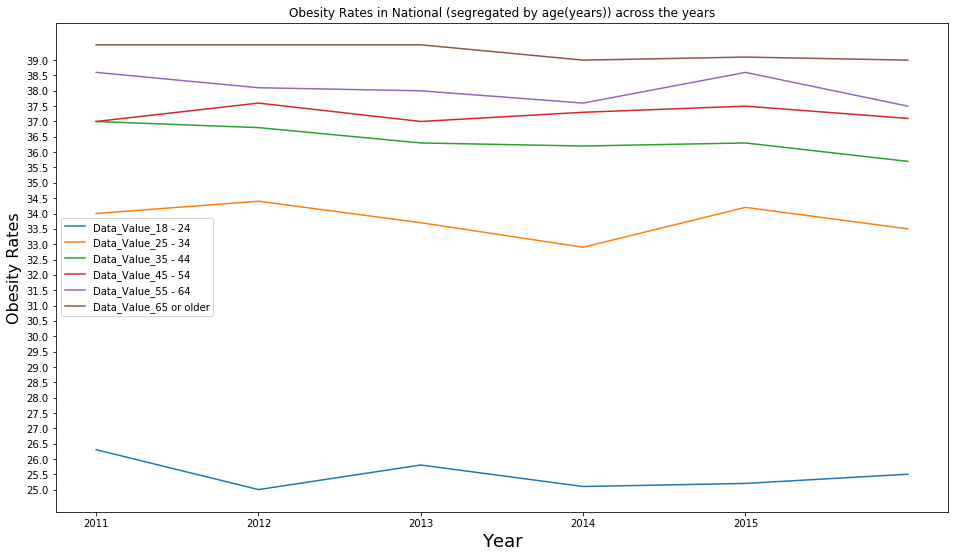

In [295]:
# Overweight rates for the entire nation

manipulate_and_plot_nutrition_data('Age(years)', 
                                   'Percent of adults aged 18 years and older who have an overweight classification', 
                                   'National', 
                                   'Obesity Rates',
                                    1,
                                    0.5)

### Can we do some statistical analysis ? Perhaps testing some hypothesis' ?

#### Unfortunately, though we look to be having more data, the actual number of observations is limited by the number of years in our sample, which is 6(which is too low to get something statistically significant)